# Some Libraries that we will need  

In [2]:
# For preprocessing: 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# First view of the data 

In [4]:
df = pd.read_csv("D:/Mzakra/Projects/Video Games Sales/vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

There are 16598 observations and 11 features in this dataset. 



In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


* There is a small amount of null values.
* The ("Year") column datatype can be an int so we will change it later.
* The datatypes seems alright.

In [9]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


* The data seems fine no outliers so far.

In [10]:
for i in list(df.columns):
    
    print("\n ************ "+i+" ************\n")
    print("\n",df[i].value_counts())
    print("\n",df[i].describe(),"\n")


 ************ Rank ************


 1        1
11089    1
11059    1
11060    1
11061    1
        ..
5539     1
5540     1
5541     1
5542     1
16600    1
Name: Rank, Length: 16598, dtype: int64

 count    16598.000000
mean      8300.605254
std       4791.853933
min          1.000000
25%       4151.250000
50%       8300.500000
75%      12449.750000
max      16600.000000
Name: Rank, dtype: float64 


 ************ Name ************


 Need for Speed: Most Wanted                12
Ratatouille                                 9
FIFA 14                                     9
LEGO Marvel Super Heroes                    9
Madden NFL 07                               9
                                           ..
Ar tonelico Qoga: Knell of Ar Ciel          1
Galaga: Destination Earth                   1
Nintendo Presents: Crossword Collection     1
TrackMania: Build to Race                   1
Know How 2                                  1
Name: Name, Length: 11493, dtype: int64

 count       

**Observations:**
* Everything seems alright.

# Basic Cleaning

In [15]:
# Checking for duplicates

df.duplicated().sum()

0

In [16]:
# View the Null values

df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [20]:
# Checking the % of the null values

print(round(271 / df.shape[0], 2)) 

0.02


* It's alittle % so we will drop it

In [21]:
# Droping Null values

df.dropna(inplace = True)
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [30]:
# Changing ("Year") column data type to int

df['Year'] = pd.to_numeric(df["Year"])

In [29]:
df["Year"].dtype

dtype('int64')

#  Visualisation & Insights

In [47]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [44]:
# Number of unique Games

df["Name"].nunique()

11325

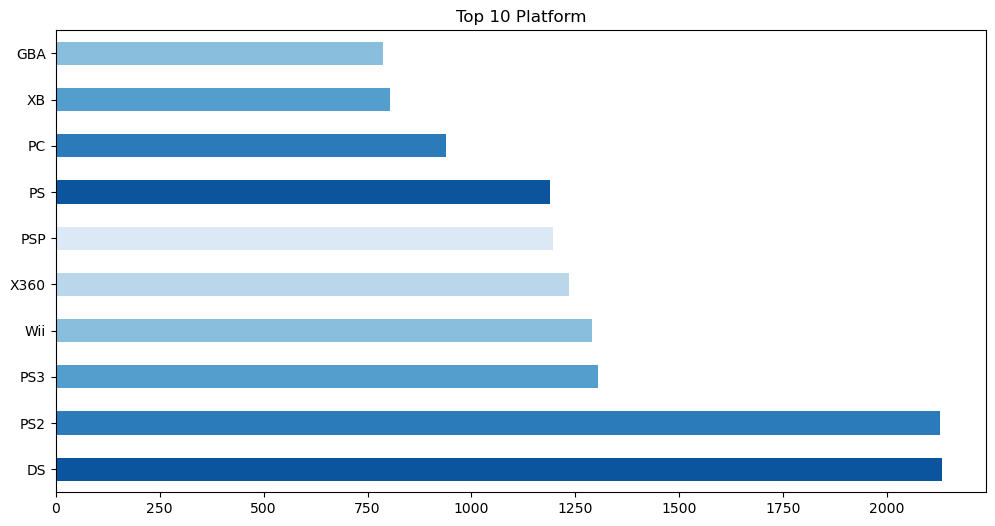

In [70]:
# Top 10 Video_games platform

Platform_counts = df['Platform'].value_counts()
Platform_counts[:10].plot(kind = 'barh', color = sns.color_palette("Blues_r"), title = "Top 10 Platform", figsize = (12,6));

### ▶️ DS & PS2 is the most 2 Platform making Video_Games

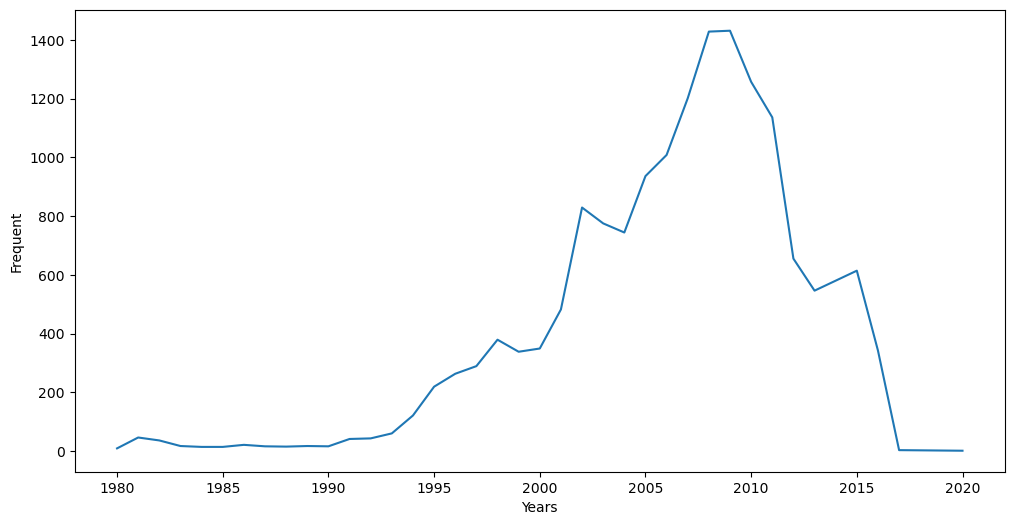

In [67]:
# Time Stamp for Games year

release_year = df['Year'].value_counts()
x_values = release_year.values
plt.figure(figsize=(12,6))
sns.lineplot(data = release_year)
plt.xlabel("Years")
plt.ylabel("Frequent");

### ▶️Year 2009 is the most year making Video_Games

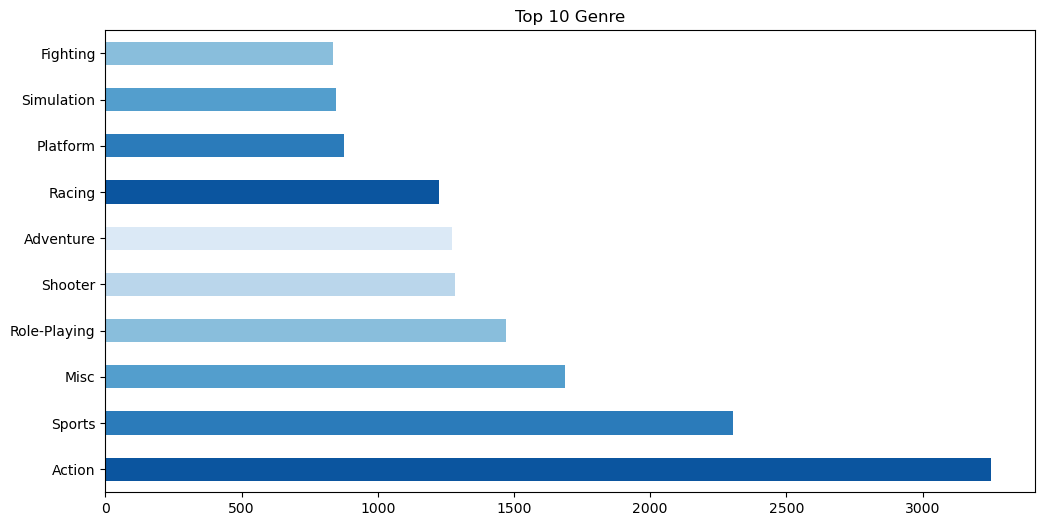

In [71]:
# Top 10 Genre 

Genre_counts = df['Genre'].value_counts()
Genre_counts[:10].plot(kind = 'barh', color = sns.color_palette("Blues_r"), title = "Top 10 Genre", figsize = (12,6));

### ▶️ The Action Genre is the most genre in Video_games

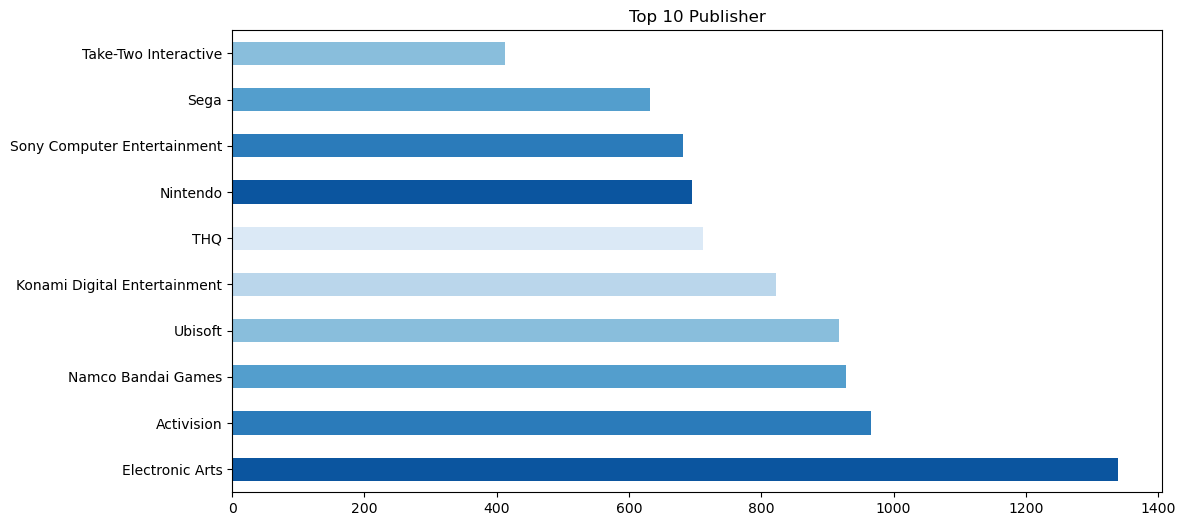

In [69]:
# Top 10 Publisher 

Publisher_counts = df['Publisher'].value_counts()
Publisher_counts[:10].plot(kind = 'barh', color = sns.color_palette("Blues_r"), title = "Top 10 Publisher", figsize = (12,6));

### ▶️EA is the most Publisher Making Video_Games

# What is the biggest platform making money?

<Figure size 1200x600 with 0 Axes>

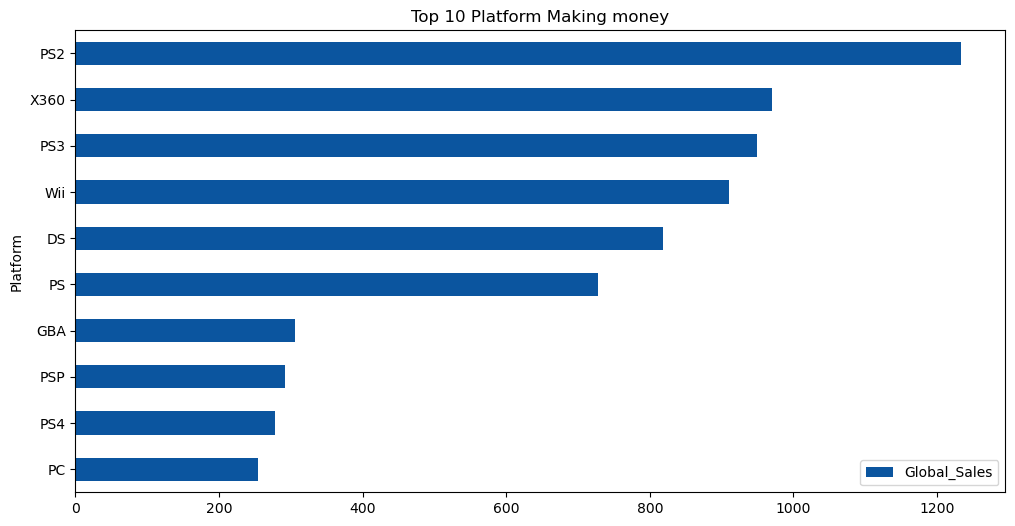

In [109]:
plt.figure(figsize = (12,6))
platform_Sales = df.groupby('Platform')["Global_Sales"].sum().to_frame().reset_index().sort_values(by = "Global_Sales")
platform_Sales.set_index('Platform', inplace=True)
platform_Sales.tail(10).plot(kind = 'barh', color = sns.color_palette("Blues_r"), title = "Top 10 Platform Making money", figsize = (12,6));

### ▶️PS2 is the most platform earn mony based in the Global_Sales

# Biggest year earning money

<Figure size 1200x600 with 0 Axes>

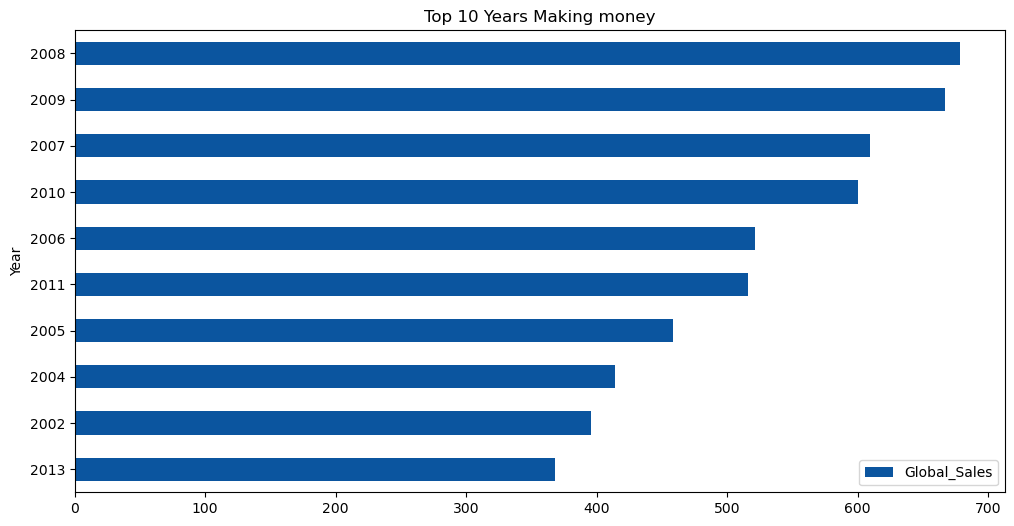

In [114]:
plt.figure(figsize = (12,6))
Year_Sales = df.groupby('Year')["Global_Sales"].sum().to_frame().reset_index().sort_values(by = "Global_Sales")
Year_Sales.set_index('Year', inplace=True)
Year_Sales.tail(10).plot(kind = 'barh', color = sns.color_palette("Blues_r"), title = "Top 10 Years Making money", figsize = (12,6));

### ▶️Year 2008 is the most year erning money based in Global_Sales

# Most Publisher earning money

<Figure size 1200x600 with 0 Axes>

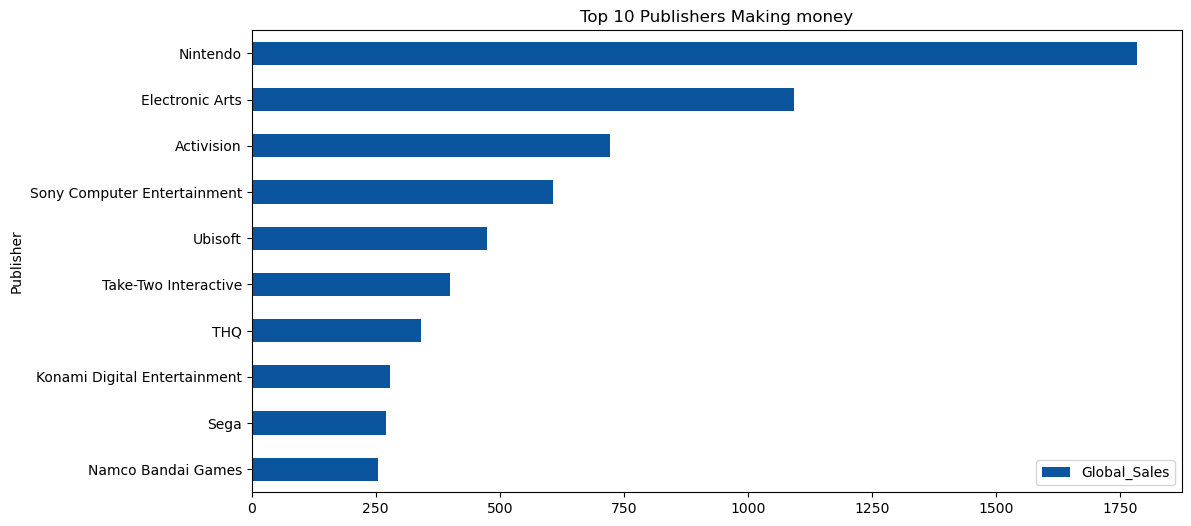

In [115]:
plt.figure(figsize = (12,6))
Publisher_Sales = df.groupby('Publisher')["Global_Sales"].sum().to_frame().reset_index().sort_values(by = "Global_Sales")
Publisher_Sales.set_index('Publisher', inplace=True)
Publisher_Sales.tail(10).plot(kind = 'barh', color = sns.color_palette("Blues_r"), title = "Top 10 Publishers Making money", figsize = (12,6));

### ▶️Nintendo is the most Publisher making money based in the Global_Sales